### Formula One
<img src="image.jpg" width = 1000 height = 5 title="Formula one">

<strong><em>Formula one is one sport that attracts many, back in the days when television was the main source of news, a good number followed through with the sports news to learn how their favorite driver and constructor team faired in the various grand prix races and also who was on cause to win the title
</em></strong>


The formula one website has all the data dating back to year <strong><span style="color: blue">1950</span></strong>, it would be interesting to learn how the competition has transitioned over the years, the same 
    




*One of the skills that analyst must poses is even how to extract data, ahead of transforming and perfroming the necessary analysis*

Below is part of borrowed code to even get the data, note, confirmation should be done to ensure no there are no violation of the rules.

*Codes used to extract the data*

`from bs4 import BeautifulSoup`

`import requests`

`soup = BeautifulSoup(webpage.content, "html.parser")`

`table = soup.find("table", class_="table name")`

##### NB: robots.txt file tells search engine crawlers which URLs the crawler can access on your site

In [109]:
# importing the libraries to allow for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
formone = pd.read_csv("track.csv")
formone.head(5)

,One,Two,Three,Four,Five,Six,Seven,year
0,NaN,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,NaN,1950
1,NaN,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,NaN,1950
2,NaN,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,NaN,1950
3,NaN,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,NaN,1950
4,NaN,5,Alberto Ascari ASC,ITA,Ferrari,11.0,NaN,1950


In [111]:
# Data shape - the number of rows and columns
formone.shape

(1618, 8)

In [112]:
# Data details - data is composed of objects and floats types
formone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   One     0 non-null      float64
 1   Two     1618 non-null   object 
 2   Three   1618 non-null   object 
 3   Four    1618 non-null   object 
 4   Five    1607 non-null   object 
 5   Six     1618 non-null   float64
 6   Seven   0 non-null      float64
 7   year    1618 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 101.2+ KB


<li>When scraping for the data part of the columns were returned blank part of the cleaning exercise will be to remove the blank columns</li>

<li>The columns names are not descriptive enough, through the cleaning process the renaming will be done</li>

<li>Part of the names were returned with their intials, this will be taken care of as weel</li>

In [113]:
formone.columns

Index(['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'year'], dtype='object')

In [114]:
# Dropping of columns
new_dataone = formone.drop(["One", "Seven"], axis=1)
new_dataone.head()

,Two,Three,Four,Five,Six,year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


In [115]:
# renaming of columns
renamed_columns = new_dataone.rename(columns={"Two": "Position", 
                                              "Three": "Driver", 
                                              "Four":"Country", 
                                              "Five":"Constructor",
                                              "Six":"Points",
                                             "Seven":"Year"})

In [116]:
renamed_columns.head(5)

,Position,Driver,Country,Constructor,Points,year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


In [117]:
#Removing the 3 letter abbreiation from the name
renamed_columns["Driver"]= renamed_columns["Driver"].str[:-3]

In [118]:
renamed_columns.head()

,Position,Driver,Country,Constructor,Points,year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari,ITA,Ferrari,11.0,1950


### Analyses of the vital columns
* Number of drivers to grace the competition
* Countries represented
* Constructors present


##### Checking with representation per Country and Year

In [119]:
drivers = renamed_columns["Driver"].unique()
country = renamed_columns["Country"].unique()
constructor = renamed_columns["Constructor"].unique()
print(f"Number of drivers to: {len(drivers)}\nNumber of countries: {len(country)}\nConstructors: {len(constructor)}")

Number of drivers to: 395
Number of countries: 37
Constructors: 201


Text(0.5, 1.0, 'Country Representation')

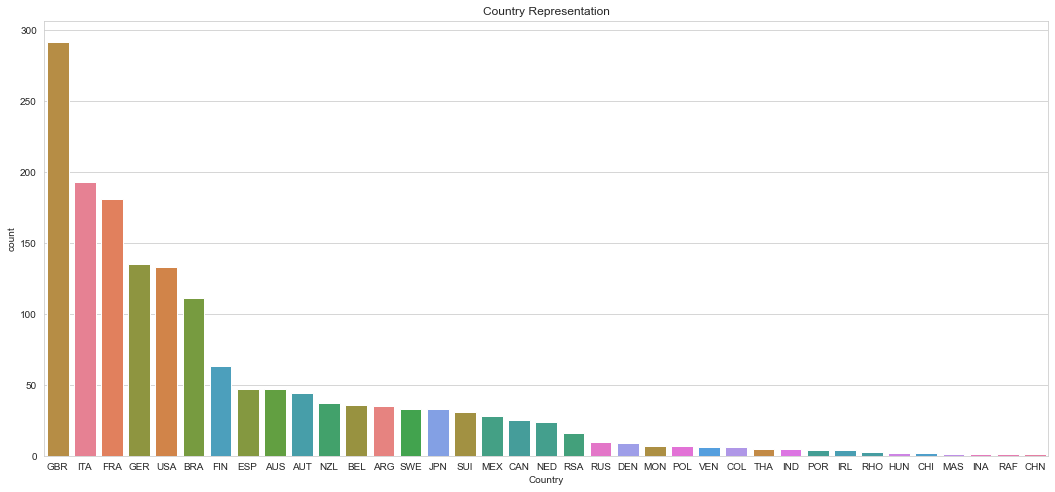

In [135]:
# Representations
sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))
sns.countplot(x = renamed_columns["Country"], order = renamed_columns["Country"].value_counts(ascending=False).index, hue=renamed_columns["Country"])
plt.title("Country Representation")

##### Notes on countries

* Great Britain(GBR) Italy(ITA), France(FRA) - top 3 countries that have the highest number of drivers
* Chile(CHI), Malaysia(MAS), Indonesia(INA), China(CHN)- have had the least number of drivers to represent them 

<Figure size 1296x360 with 0 Axes>

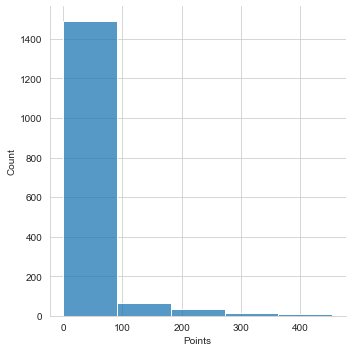

In [121]:
# points distribution
sns.set_style("whitegrid")
plt.figure(figsize=(18,5))
sns.displot(data=renamed_columns, x="Points", bins= 5)
plt.show()

* From the distribution, the data is more skewed to the right, confirmation being the magic points range between 390 - 400+, a champion will need atleast between range.


#### Analyzing the top 5 
* On the top 5 key focus will be to check drivers, constructors and Countries *

In [122]:
updated_form = renamed_columns.drop(renamed_columns.index[1022])

In [123]:
updated_form["Position"]= updated_form["Position"].astype(int)

In [124]:
top_five = updated_form[updated_form["Position"] <=1]

In [125]:
top_five.head(10)

,Position,Driver,Country,Constructor,Points,year
0,1,Nino Farina,ITA,Alfa Romeo,30.0,1950
22,1,Juan Manuel Fangio,ARG,Alfa Romeo,31.0,1951
41,1,Alberto Ascari,ITA,Ferrari,36.0,1952
63,1,Alberto Ascari,ITA,Ferrari,34.5,1953
82,1,Juan Manuel Fangio,ARG,Mercedes-Benz,42.0,1954
108,1,Juan Manuel Fangio,ARG,Mercedes-Benz,40.0,1955
133,1,Juan Manuel Fangio,ARG,Ferrari,30.0,1956
160,1,Juan Manuel Fangio,ARG,Maserati,40.0,1957
182,1,Mike Hawthorn,GBR,Ferrari,42.0,1958
203,1,Jack Brabham,AUS,Cooper Climax,31.0,1959


Text(0.5, 1.0, 'Countries performance')

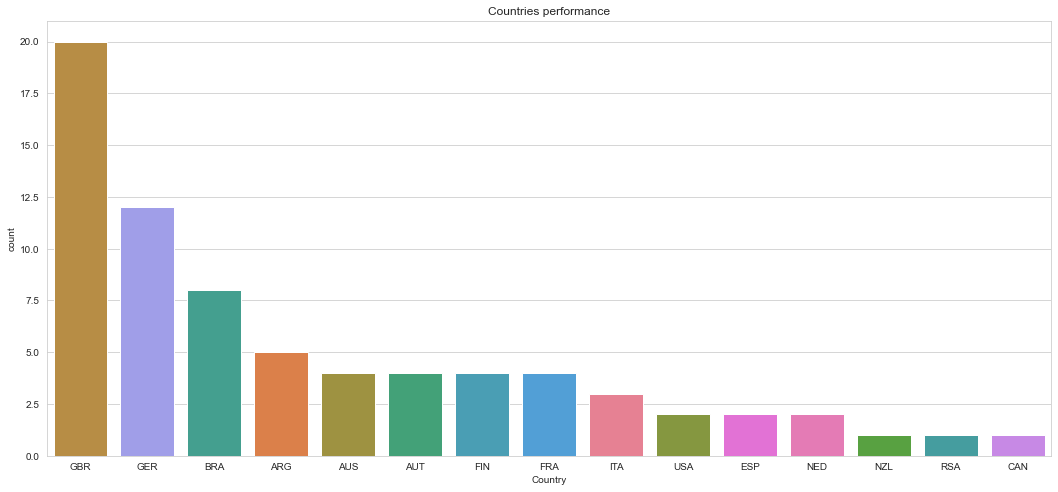

In [128]:
plt.figure(figsize=(18, 8))
sns.countplot(x=top_five["Country"], order = top_five["Country"].value_counts(ascending=False).index, hue=top_five["Country"])
plt.title("Countries performance")

### Notes on countries
* Great Britain(GBR) Germany(GER), Brazil(BRA) - top 3 countries that have the highest number of drivers to have been crowned champions


<Figure size 1296x360 with 0 Axes>

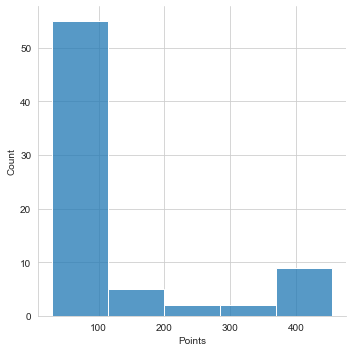

In [130]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,5))
sns.displot(data=top_five, x="Points", bins= 5)
plt.show()

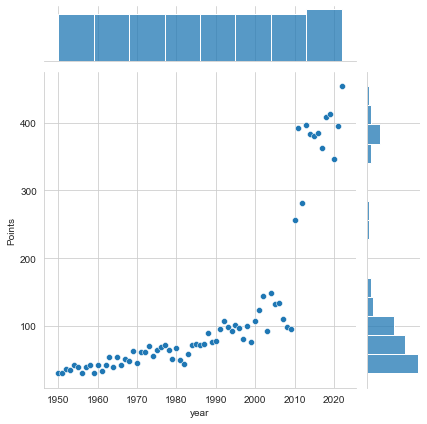

In [131]:
sns.jointplot(data = top_five, x = top_five["year"], y = top_five["Points"])

* Up until 2000, the drivers who amassed atleast 100 points was guaranteed the championship
* From 2001 till round 2009, atleast 150 was a guarantee
* From 2010 on ward the margin number over 250,
* There are some exceptions for 2018, 2019 and 2022 where the drivers crossed the 400 mark

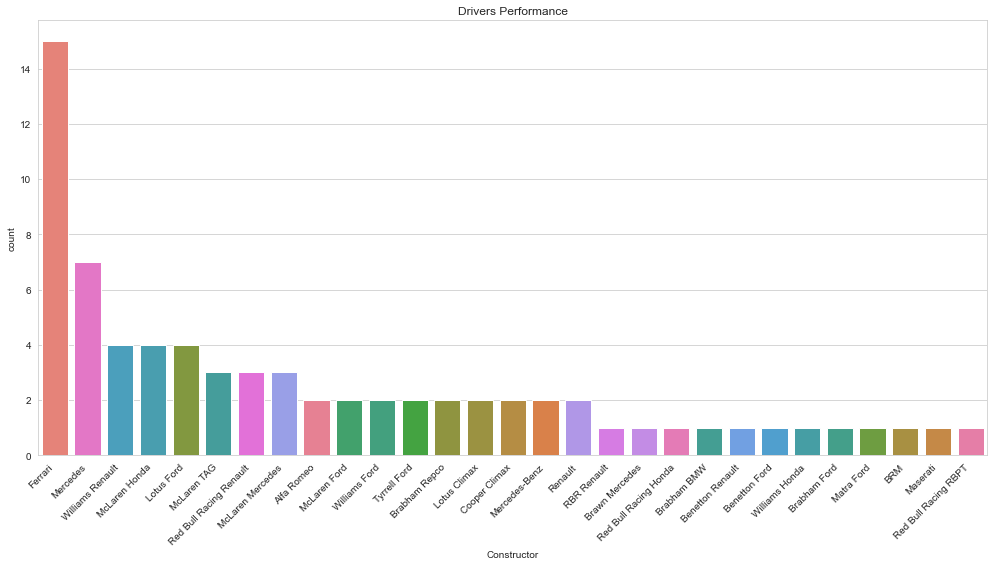

In [133]:
plt.figure(figsize=(17, 8))
sns.countplot(x=top_five["Constructor"], order = top_five["Constructor"].value_counts(ascending=False).index, hue =top_five["Constructor"])
plt.xticks(rotation = 45, ha="right")
plt.title("Drivers Performance")
plt.show()

<em><h3>Most successful constructor happen to be <span style="color: red">Ferrari</span></h3></em>

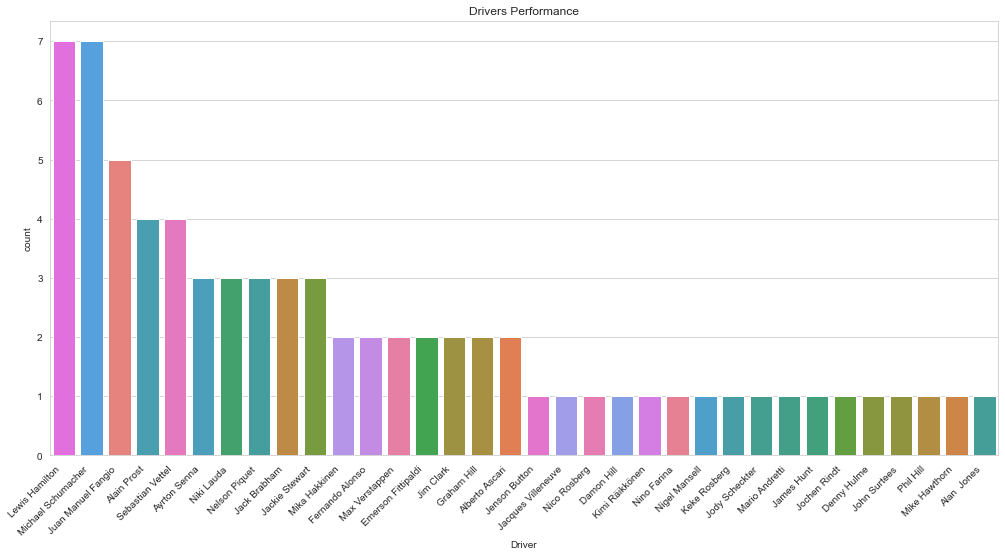

In [129]:
plt.figure(figsize=(17, 8))
sns.countplot(x=top_five["Driver"], order = top_five["Driver"].value_counts(ascending=False).index, hue =top_five["Driver"])
plt.xticks(rotation = 45, ha="right")
plt.title("Drivers Performance")
plt.show()

#### Notes on the champions
<br>
<li>Lewis Hamilton and Michael Schumacher hold the most champions won, 7 titles for each</li>
<li>Sebestain Vettel won 4 championships</li>
<li>Fernando Alonso won 2 championships</li>
<li><span style="color: green">Fernando Alonso</span> and <span style="color: green">Sebestain Vettel</span>, broke the dominance of <span style="color: red">Michael Schumacher</span></li>
<em><h4><span style="color: blue">Nico Roseberg</span> and <span style="color: blue">Kimi Raikkonen</span> are those drivers that really pushed the champions, they both managed 1 chapions each </h4></em>